### Machine Learning appliqué à l'identification des défauts de crédit 

In [1]:
# Librairies

import pandas as pd
import numpy as np
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    GridSearchCV,cross_val_score,
    RandomizedSearchCV,cross_validate,
    StratifiedKFold
)
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importation des focntions utiles 
from credit_card_default import *

### Données

Source des données :https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### Telechargement de données

In [3]:
DownloadRawData()

### Importation des données en DataFrame

In [4]:
raw_df = ReadRawData()
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
raw_df.ID.nunique()

30000

La colonne ID identifie de manière unique chaque observation de la dataframe. Donc chaque ligne de la datafram correspond à un seul client. Voici la signification de chque variable ( Source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset ):

    * ID: Identifiant de chaque client
    * LIMIT_BAL: Montant du crédit accordé en dollars taiwanais(comprend le credit individuel et le credit familial/complementaire)
    * SEX: Sexe( 1= homme, 2=femme)
    * EDUCATION : Niveau d'éducation (1=diplome d'une école supérieure,2=université,3=lycée,4=autres,5=inconnu,6=inconnu)
    * MARRAIGE: Statut matrimonial(1=marié,2=célibataire,3=autre)
    * AGE: Age en années
    * PAY_0: Statut de paiement en septembre 2005 (-1=paiement régulier, 1=retard de paiement d'un mois,2=retard de paiement de deux mois,... 8=retard de paiement de huit mois,9=Retard de paiement de neuf mois et plus)
    * PAY_2: Statut de paiement en aout 2005(échelle identique à celle ci-dessus)
    * PAY_3: Statut de paiement en juiellet 2005 (échelle identique à celle ci-dessus)
    * PAY_4: Statut de paiement en juin 2005(échelle identique à celle ci-dessus)
    * PAY_5: Statut de paiement en mai(échelle identique à celle ci-dessus)
    * PAY_6: Statut de paiement en avril 2005(échelle identique à celle ci-dessus)
    * BILL_AMT1: Montant de la facture en septembre 2005(en dollars taiwanais)
    * BILL_AMT2: Montant de la facture en aout 2005(en dollars taiwanais)
    * BILL_AMT3: Montant de la facture en juillet 2005(en dollars taiwanais)
    * BILL_AMT4: Montant de la facture en juin(en dollars taiwanais)
    * BILL_AMT5: Montant de la facture en mai(en dollars taiwanais)
    * BILL_AMT6: Montant de la facture en avril 20005(en dollars taiwanais)
    * PAY_AMT1: Montant du paiement précédent en septembre 2005(en dollars taiwanais)
    * PAY_AMT2: Montant du paiement précédent en aout 2005(en dollars taiwanais)
    * PAY_AMT3: Montant du paiement précédent en juillet(en dollars taiwanais)
    * PAY_AMT4: Montant du paiement précédent en juin 2005(en dollars taiwanais)
    * PAY_AMT5: Montant du paiement précédent en mai 2005(en dollars taiwanais)
    * PAY_AMT6: Montant du paiement précédent en avril 2005(en dollars taiwanais)
    * default payment next month: Défaut de paiement( 1= oui,0=non)





In [7]:
# Formatage de données et création de nouveaux noms de colonnes
df = FormattageRawData()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          30000 non-null  int64   
 1   limit_bal                   30000 non-null  int64   
 2   sex                         30000 non-null  category
 3   education                   30000 non-null  category
 4   marriage                    30000 non-null  category
 5   age                         30000 non-null  int64   
 6   payment_status_sep          30000 non-null  category
 7   payment_status_aug          30000 non-null  category
 8   payment_status_jul          30000 non-null  category
 9   payment_status_jun          30000 non-null  category
 10  payment_status_may          30000 non-null  category
 11  payment_status_apr          30000 non-null  category
 12  bill_statement_sep          30000 non-null  int64   
 13  bill_statement_a

### Analyse exploratoire des données

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


In [10]:
df.describe(include=['category']).T

,count,unique,top,freq
sex,30000,2,Female,18112
education,30000,4,University,14030
marriage,30000,3,Single,15964
payment_status_sep,30000,11,0,14737
payment_status_aug,30000,11,0,15730
payment_status_jul,30000,11,0,15764
payment_status_jun,30000,11,0,16455
payment_status_may,30000,10,0,16947
payment_status_apr,30000,10,0,16286
default_payment_next_month,30000,2,0,23364


### Analyse univarié

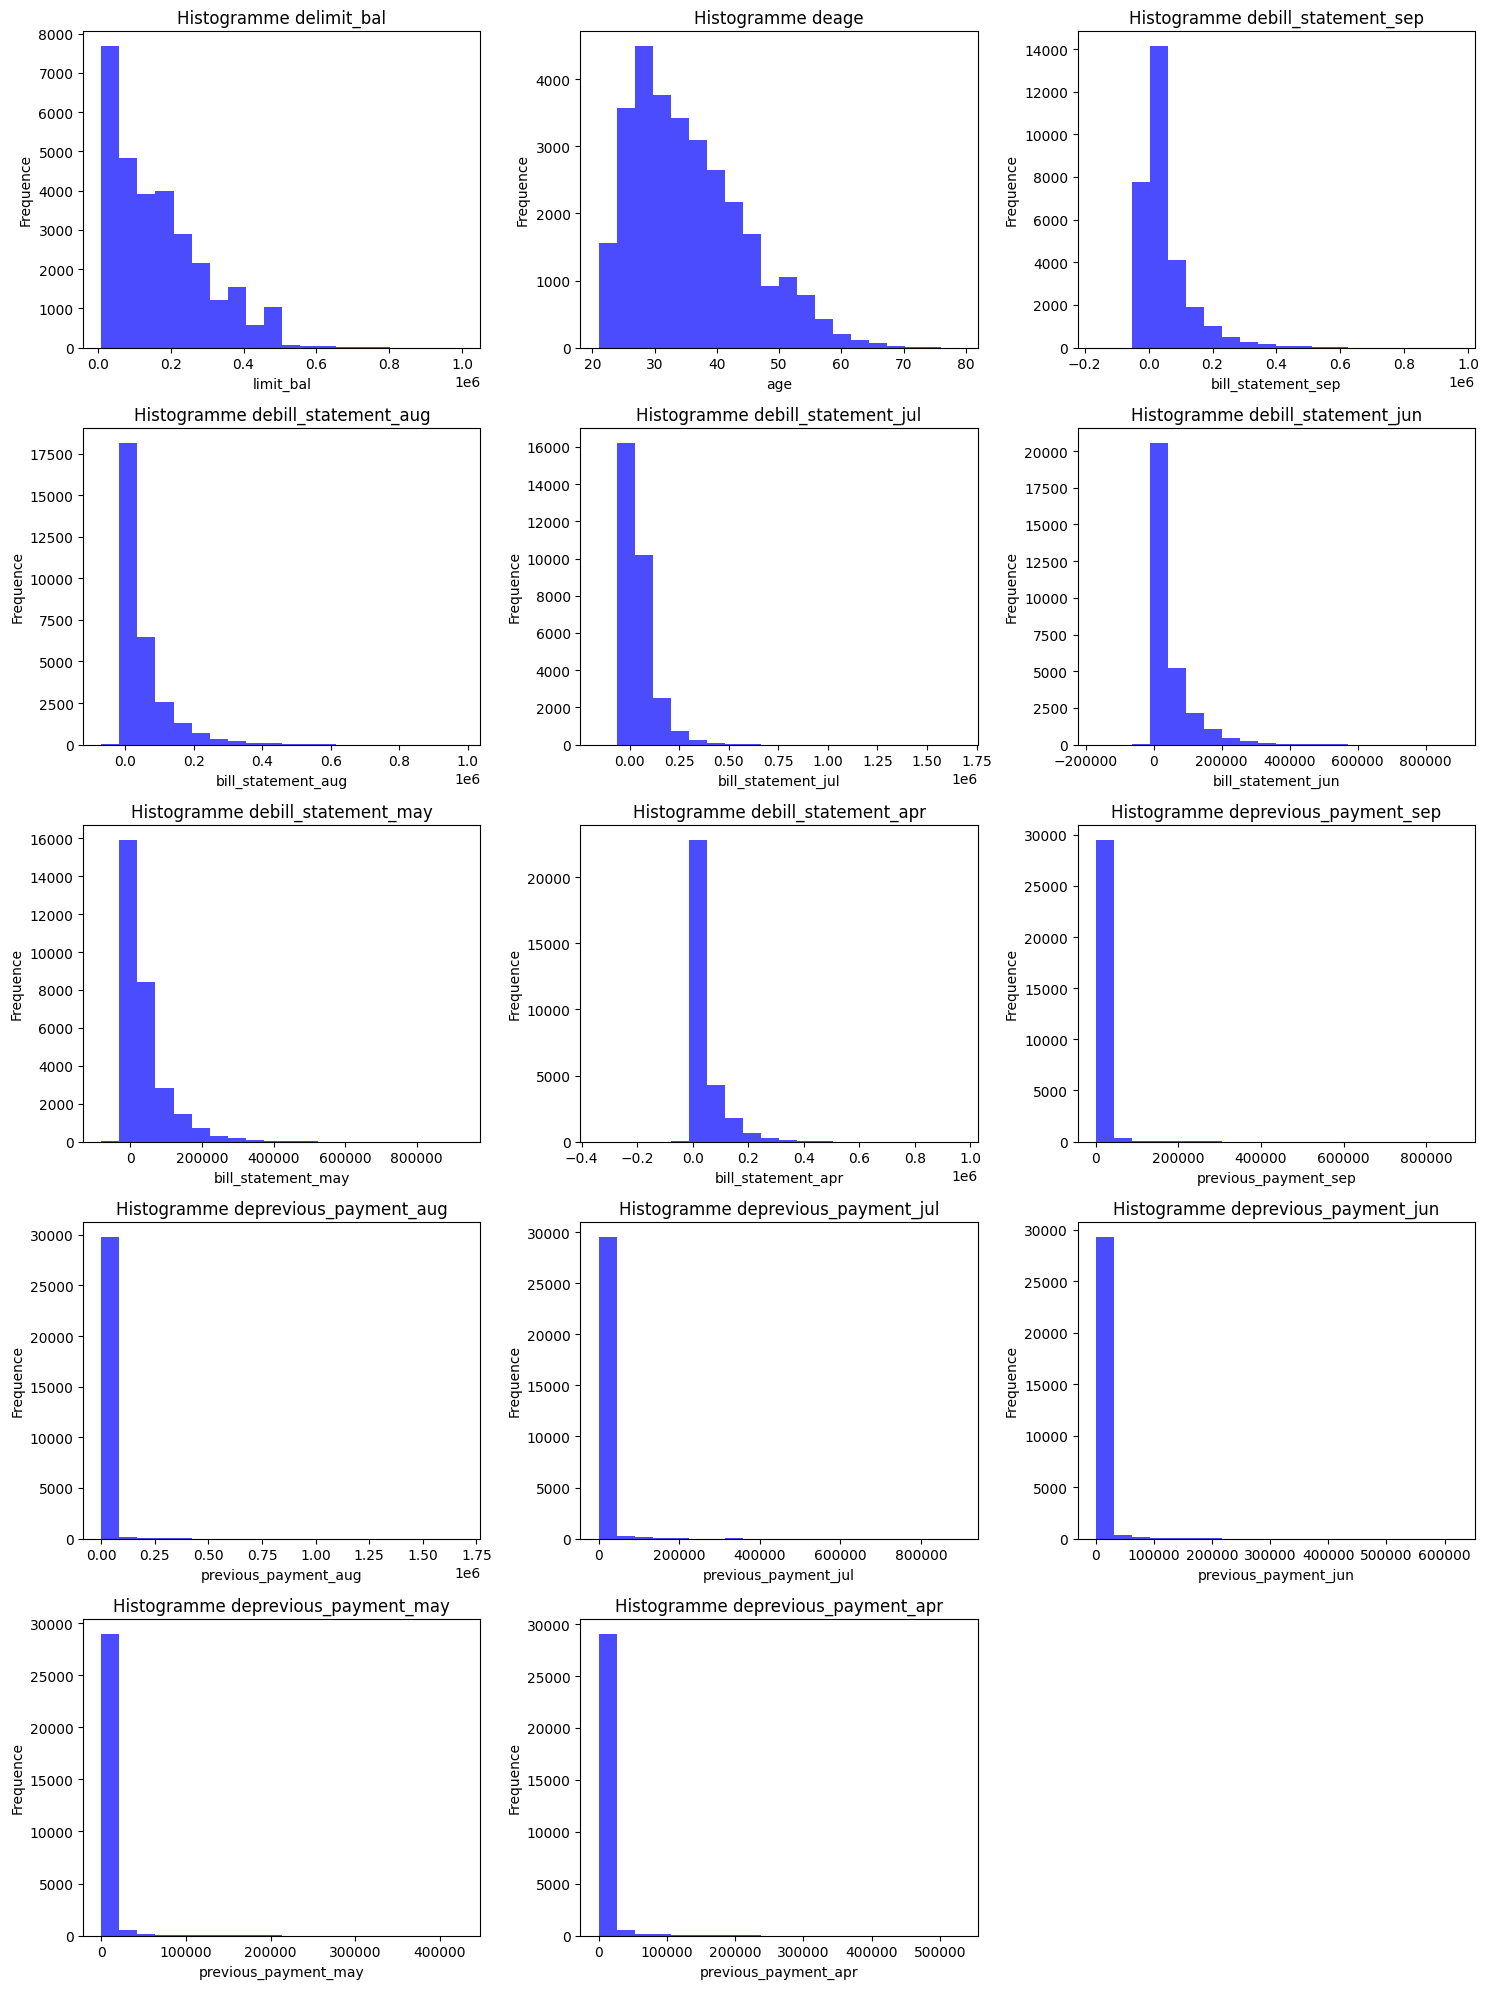

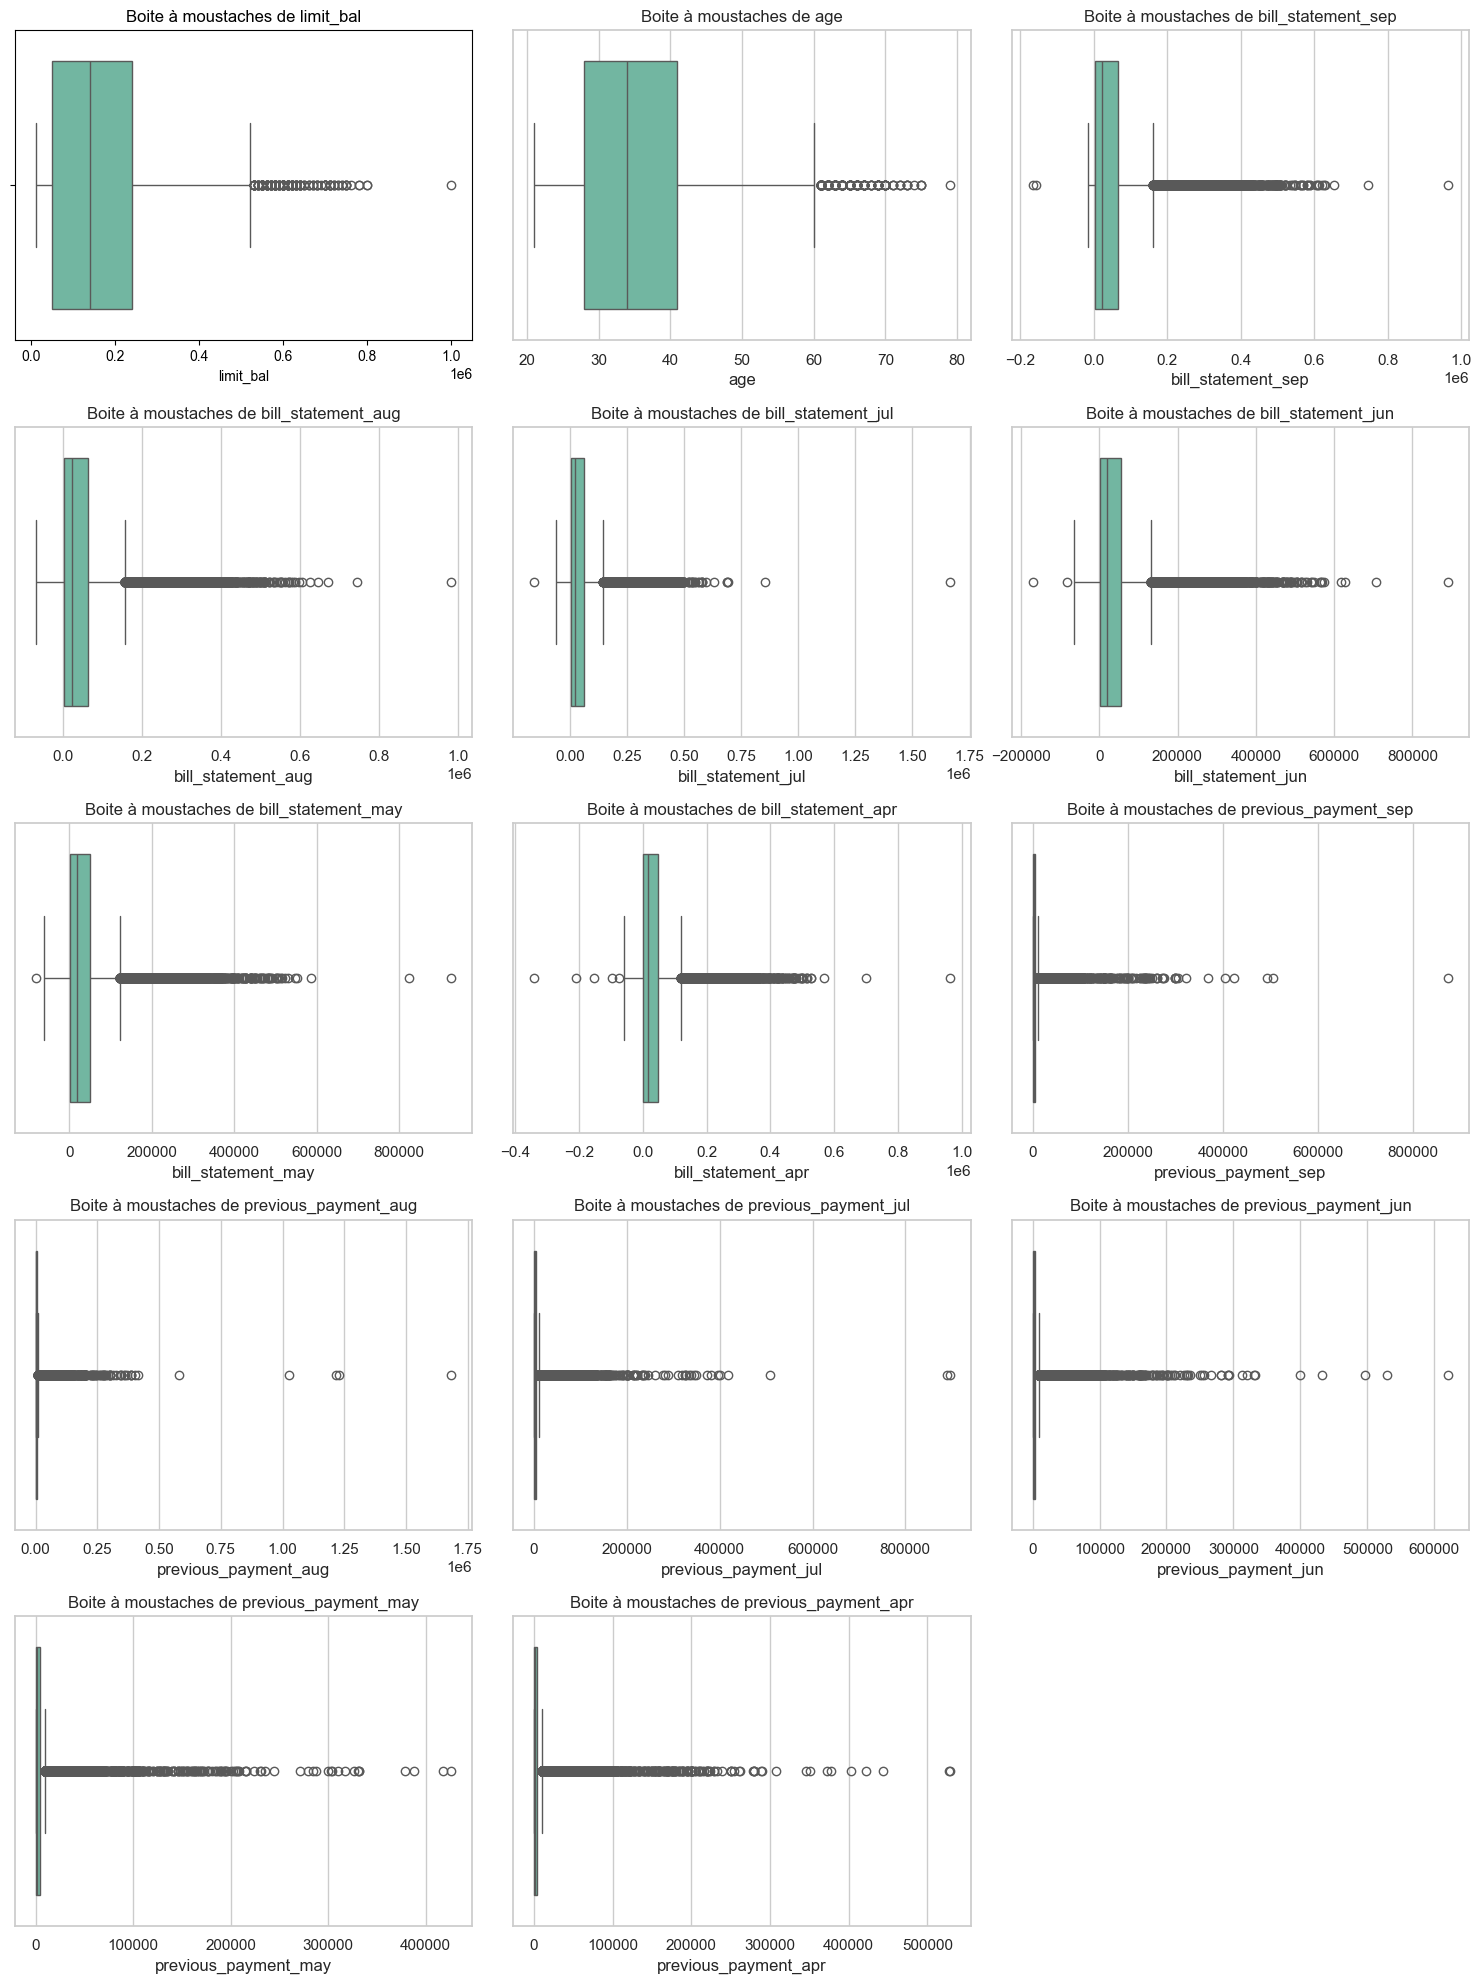

Analyse univariée de la colonne 'sex':

Frequence des catégories :
 sex
Female    0.603733
Male      0.396267
Name: proportion, dtype: float64



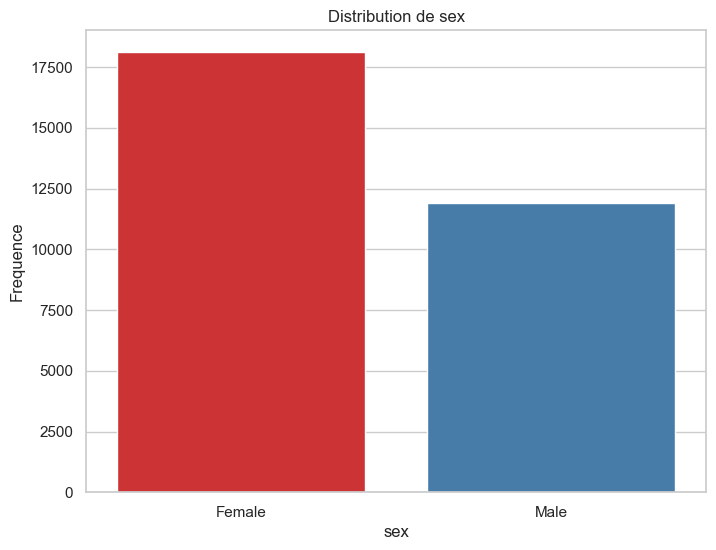

Statistiques descriptives pour sex:

count      30000
unique         2
top       Female
freq       18112
Name: sex, dtype: object


Analyse univariée de la colonne 'education':

Frequence des catégories :
 education
University         0.467667
Graduate school    0.352833
High school        0.163900
Others             0.015600
Name: proportion, dtype: float64



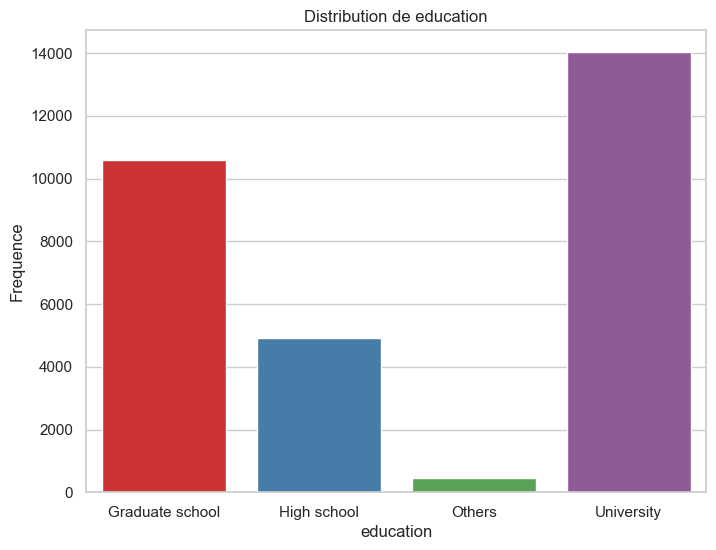

Statistiques descriptives pour education:

count          30000
unique             4
top       University
freq           14030
Name: education, dtype: object


Analyse univariée de la colonne 'marriage':

Frequence des catégories :
 marriage
Single     0.532133
Married    0.455300
Others     0.012567
Name: proportion, dtype: float64



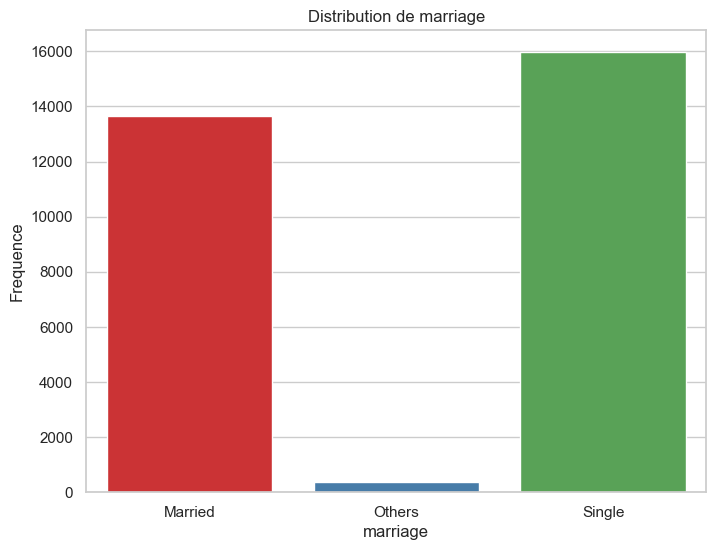

Statistiques descriptives pour marriage:

count      30000
unique         3
top       Single
freq       15964
Name: marriage, dtype: object


Analyse univariée de la colonne 'default_payment_next_month':

Frequence des catégories :
 default_payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64



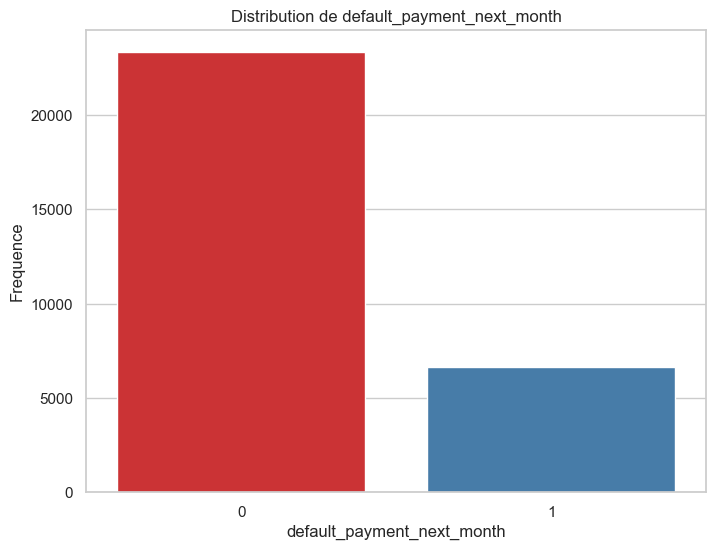

Statistiques descriptives pour default_payment_next_month:

count     30000
unique        2
top           0
freq      23364
Name: default_payment_next_month, dtype: int64


Analyse univariée de la colonne 'payment_status_sep':

Frequence des catégories :
 payment_status_sep
 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
 9    0.000000
Name: proportion, dtype: float64



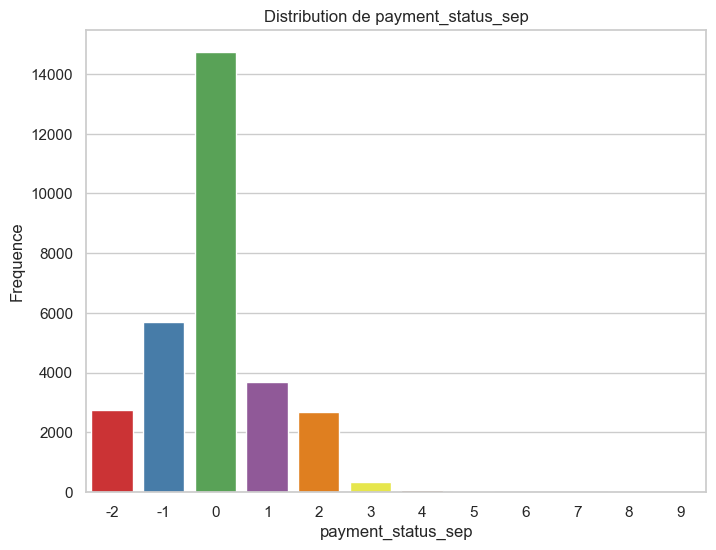

Statistiques descriptives pour payment_status_sep:

count     30000
unique       11
top           0
freq      14737
Name: payment_status_sep, dtype: int64


Analyse univariée de la colonne 'payment_status_aug':

Frequence des catégories :
 payment_status_aug
 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
 9    0.000000
Name: proportion, dtype: float64



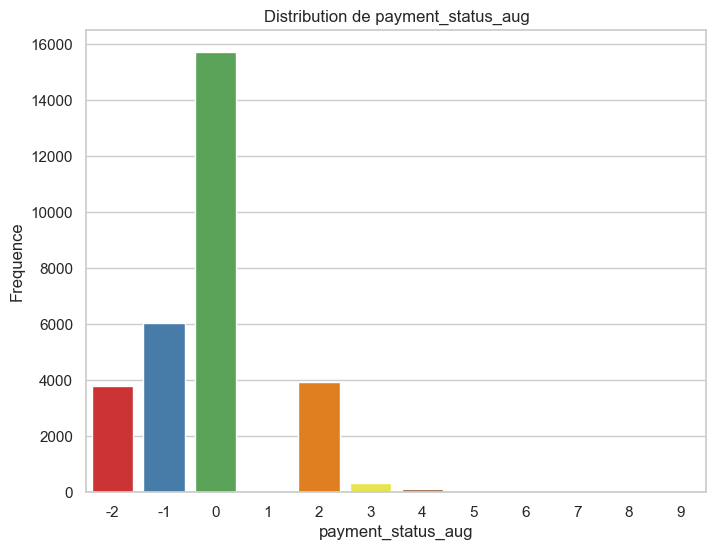

Statistiques descriptives pour payment_status_aug:

count     30000
unique       11
top           0
freq      15730
Name: payment_status_aug, dtype: int64


Analyse univariée de la colonne 'payment_status_jul':

Frequence des catégories :
 payment_status_jul
 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
 9    0.000000
Name: proportion, dtype: float64



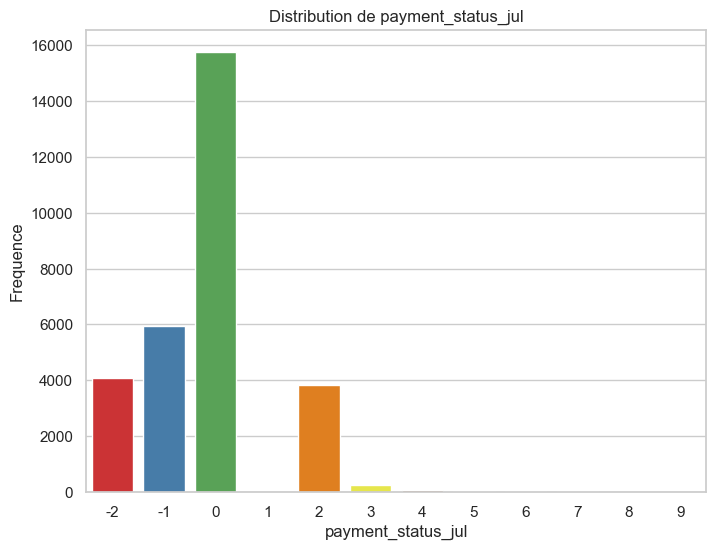

Statistiques descriptives pour payment_status_jul:

count     30000
unique       11
top           0
freq      15764
Name: payment_status_jul, dtype: int64


Analyse univariée de la colonne 'payment_status_jun':

Frequence des catégories :
 payment_status_jun
 0    0.548500
-1    0.189567
-2    0.144933
 2    0.105300
 3    0.006000
 4    0.002300
 7    0.001933
 5    0.001167
 6    0.000167
 1    0.000067
 8    0.000067
 9    0.000000
Name: proportion, dtype: float64



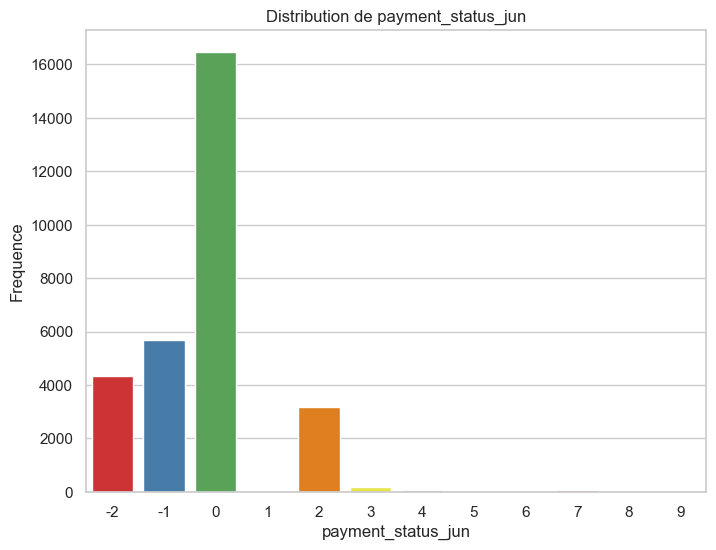

Statistiques descriptives pour payment_status_jun:

count     30000
unique       11
top           0
freq      16455
Name: payment_status_jun, dtype: int64


Analyse univariée de la colonne 'payment_status_may':

Frequence des catégories :
 payment_status_may
 0    0.564900
-1    0.184633
-2    0.151533
 2    0.087533
 3    0.005933
 4    0.002800
 7    0.001933
 5    0.000567
 6    0.000133
 8    0.000033
 1    0.000000
 9    0.000000
Name: proportion, dtype: float64



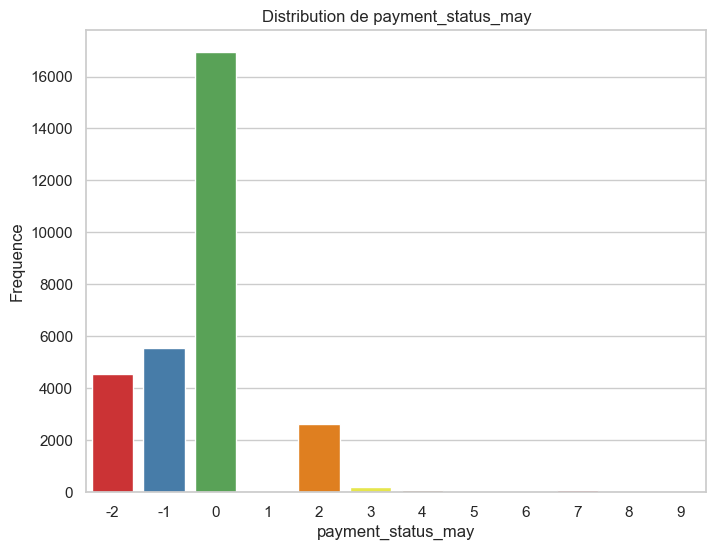

Statistiques descriptives pour payment_status_may:

count     30000
unique       10
top           0
freq      16947
Name: payment_status_may, dtype: int64


Analyse univariée de la colonne 'payment_status_apr':

Frequence des catégories :
 payment_status_apr
 0    0.542867
-1    0.191333
-2    0.163167
 2    0.092200
 3    0.006133
 4    0.001633
 7    0.001533
 6    0.000633
 5    0.000433
 8    0.000067
 1    0.000000
 9    0.000000
Name: proportion, dtype: float64



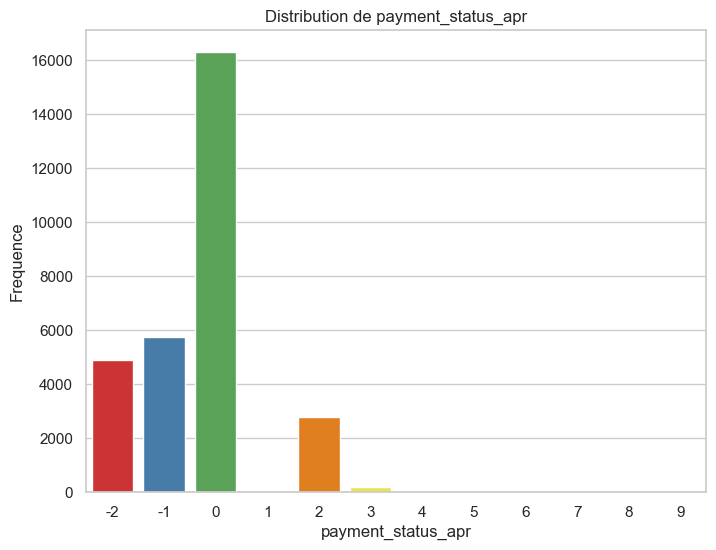

Statistiques descriptives pour payment_status_apr:

count     30000
unique       10
top           0
freq      16286
Name: payment_status_apr, dtype: int64




In [11]:
plot_distribution(df)

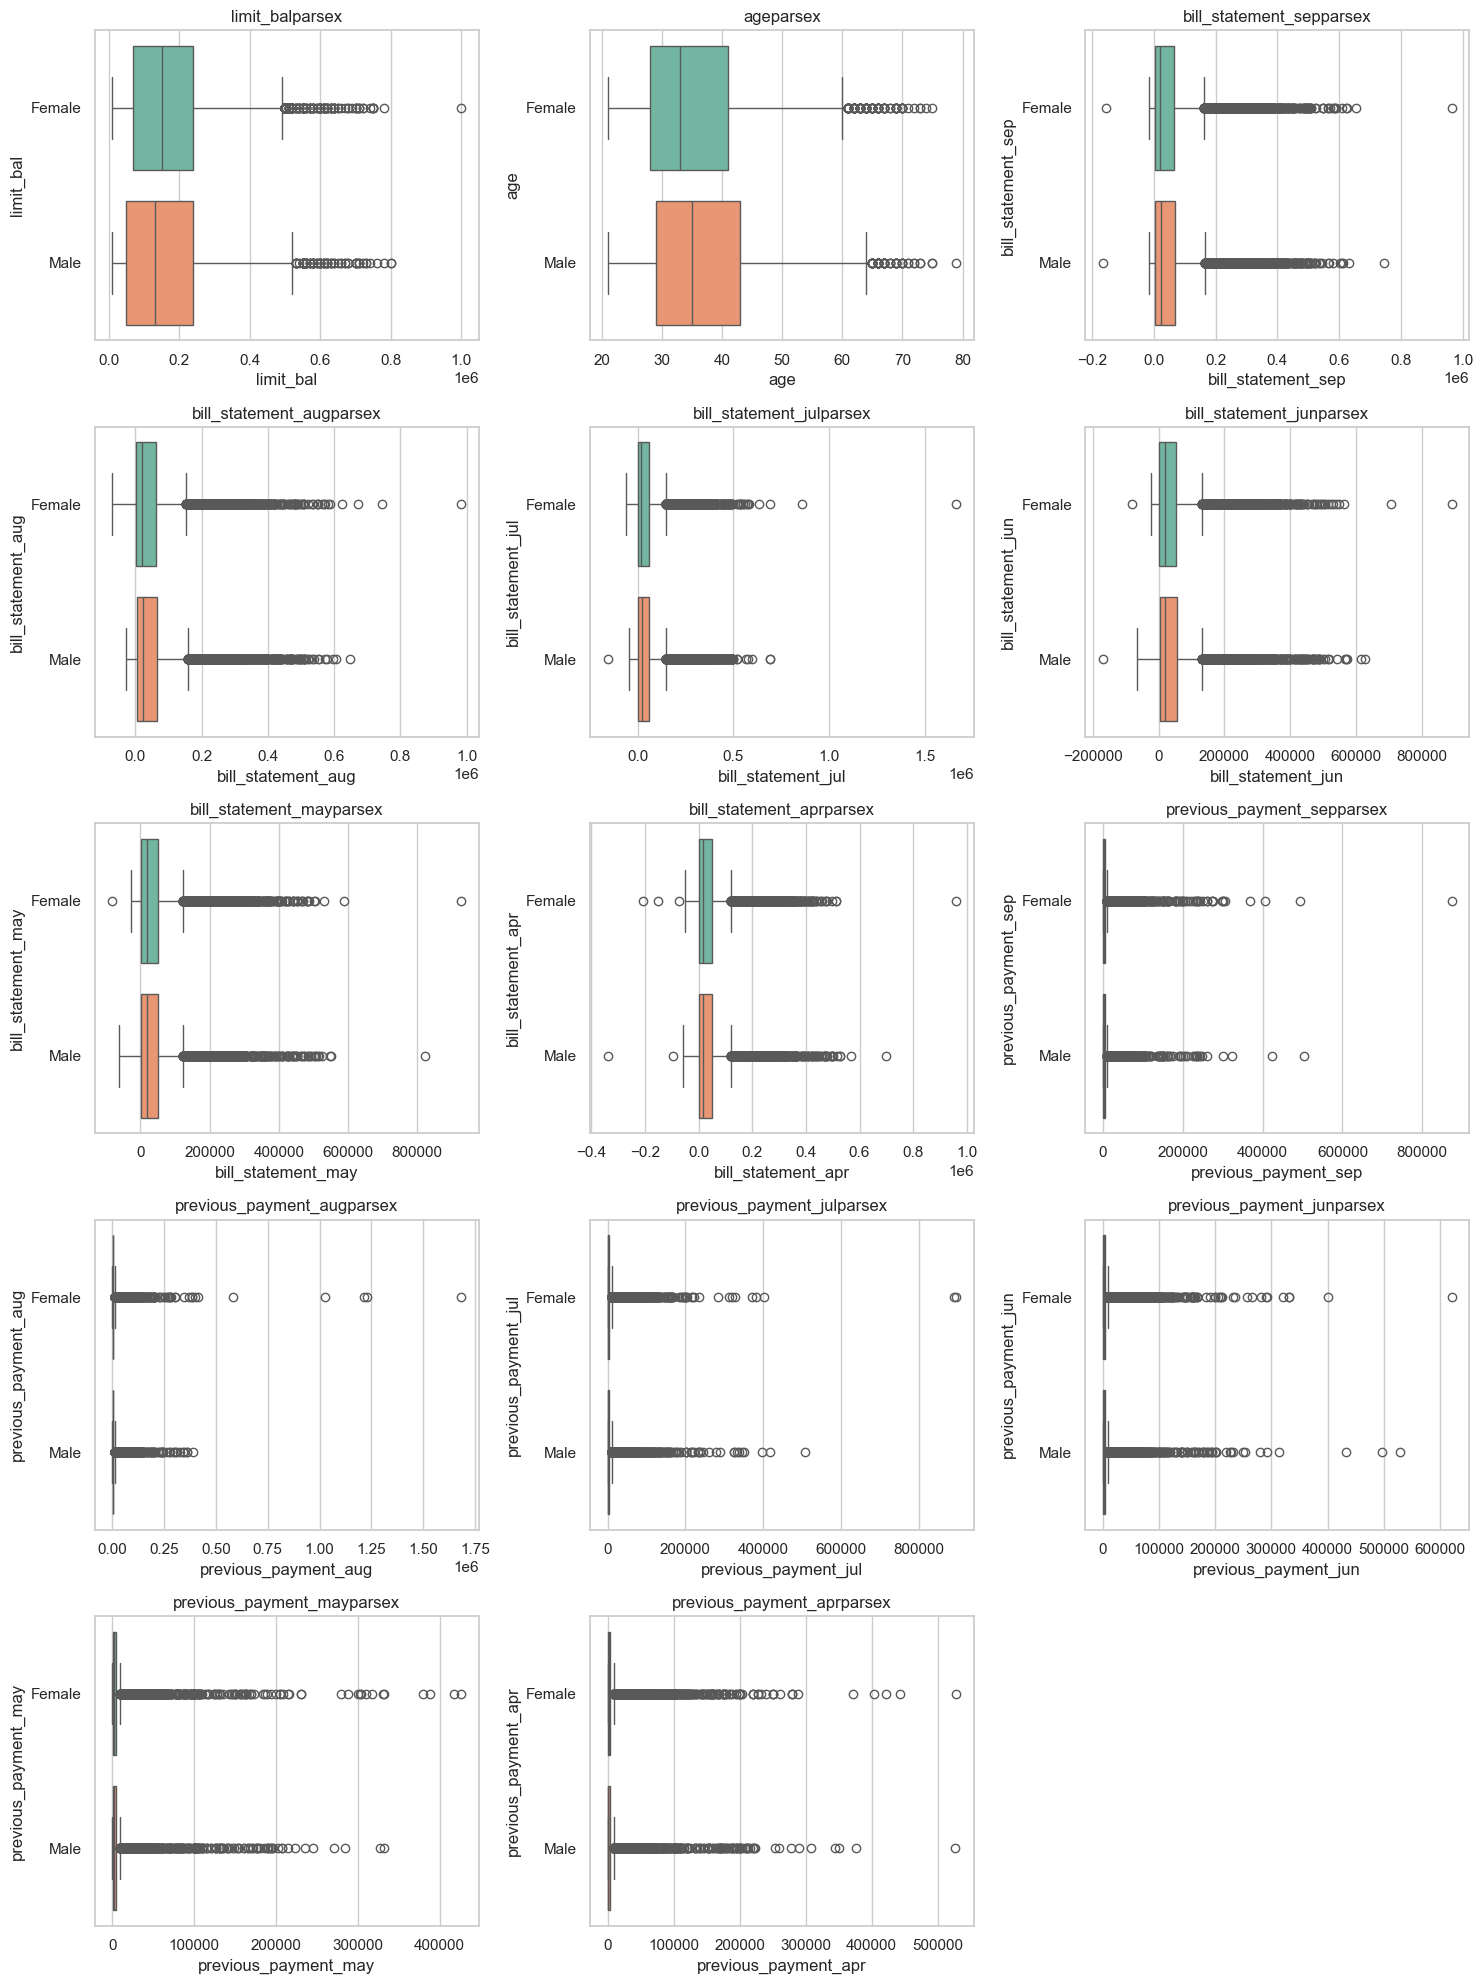

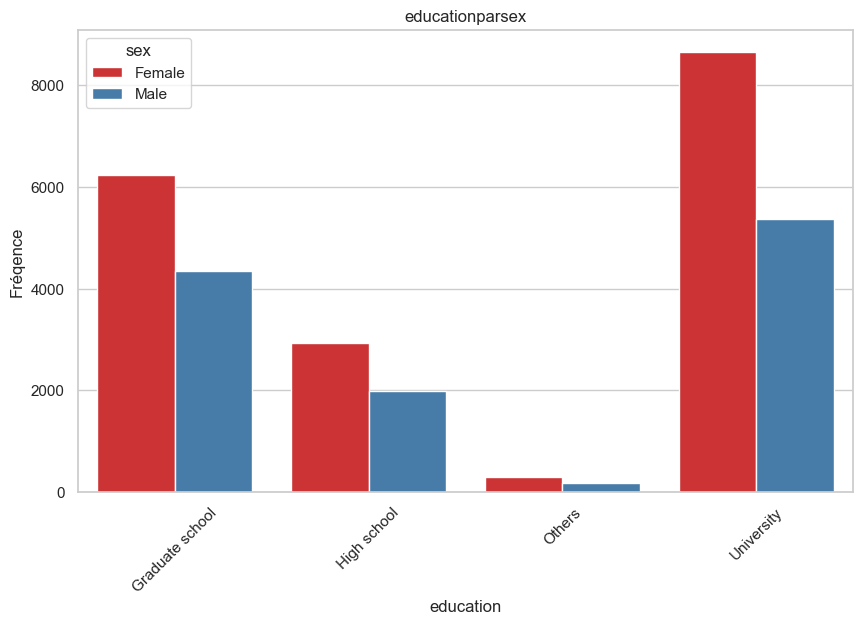

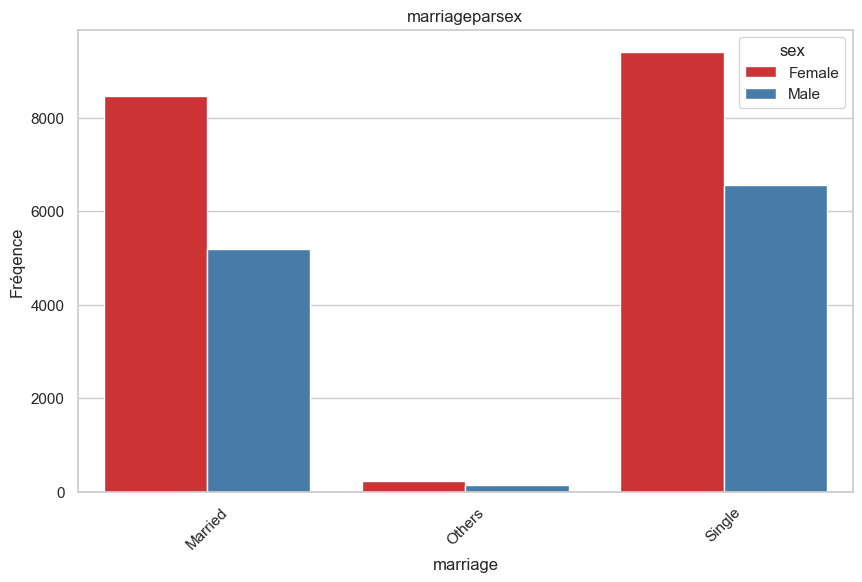

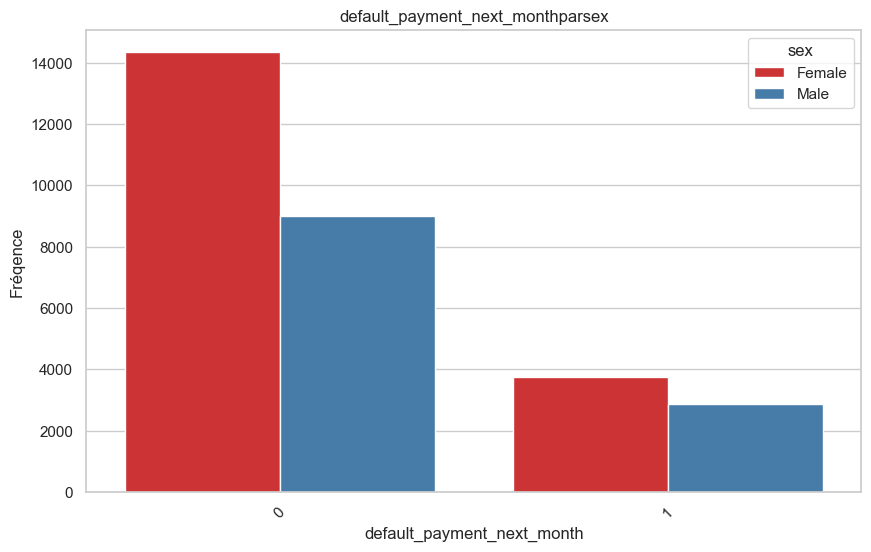

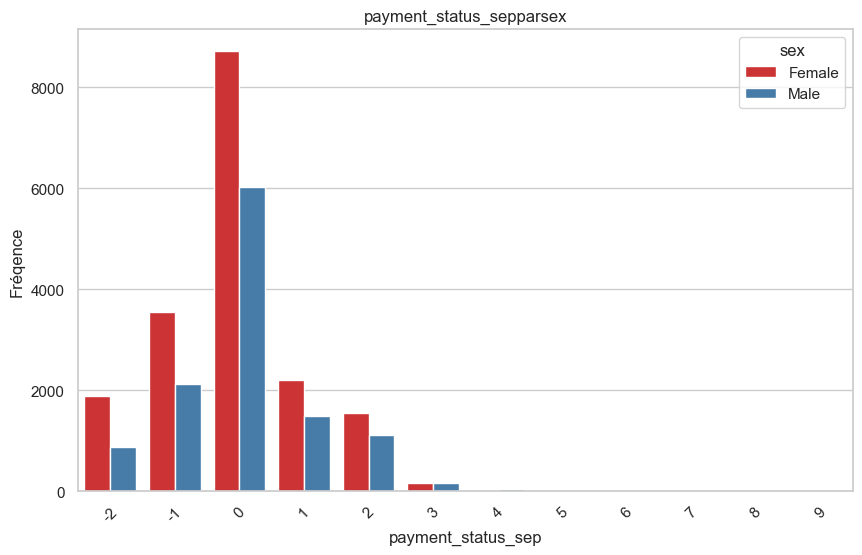

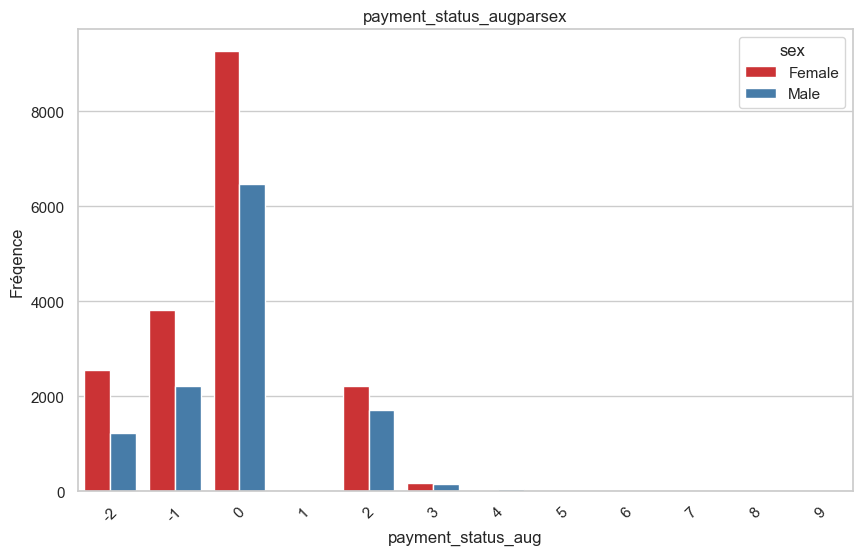

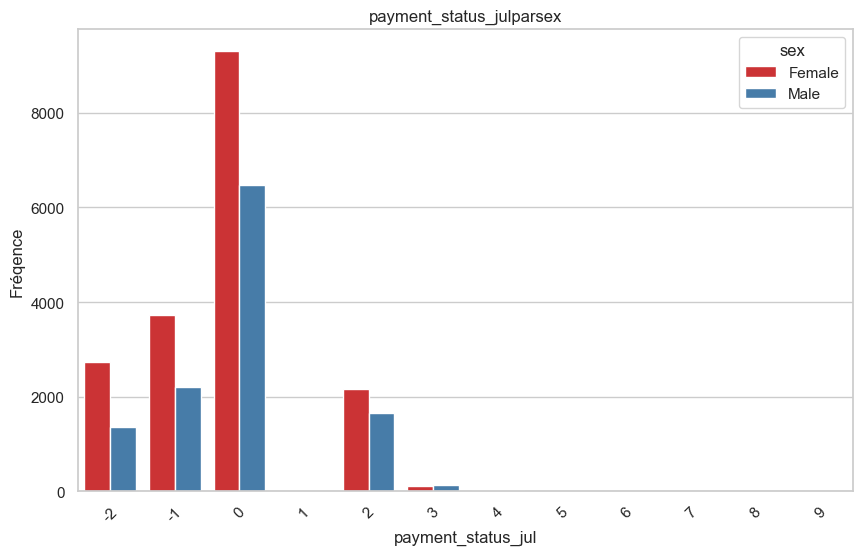

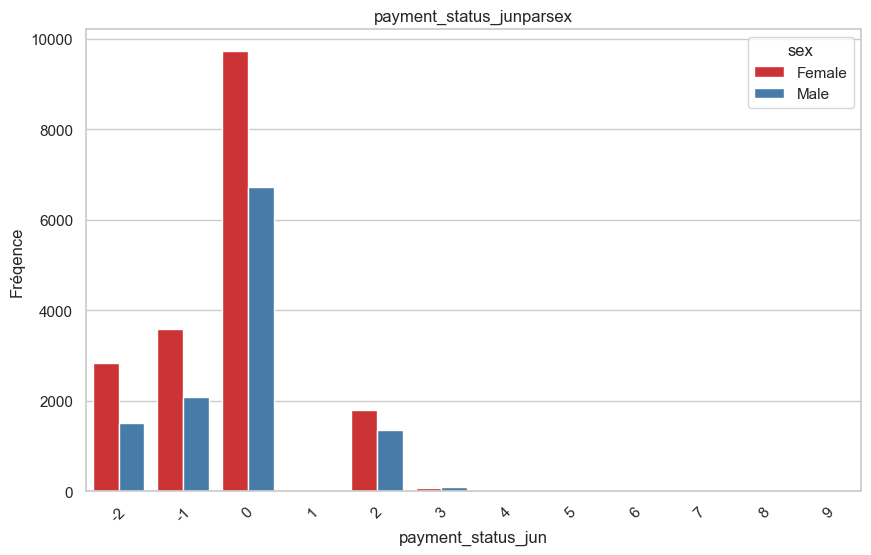

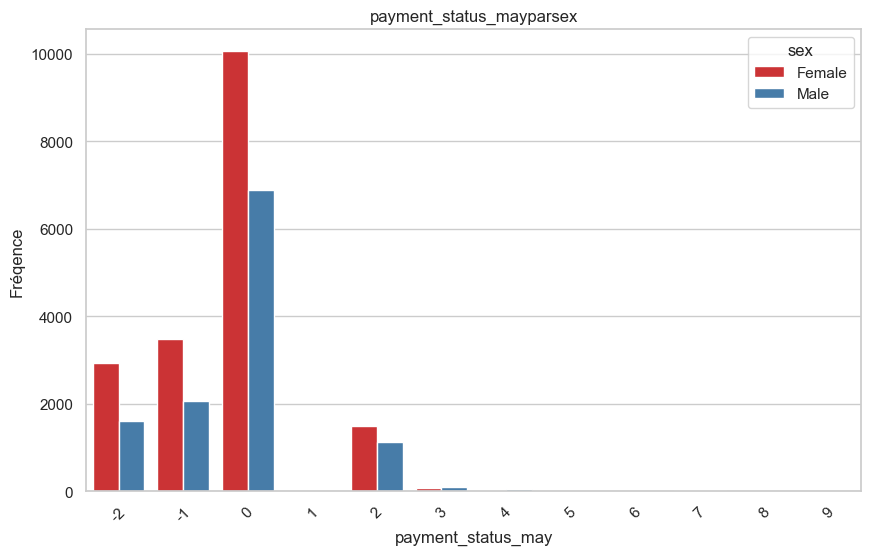

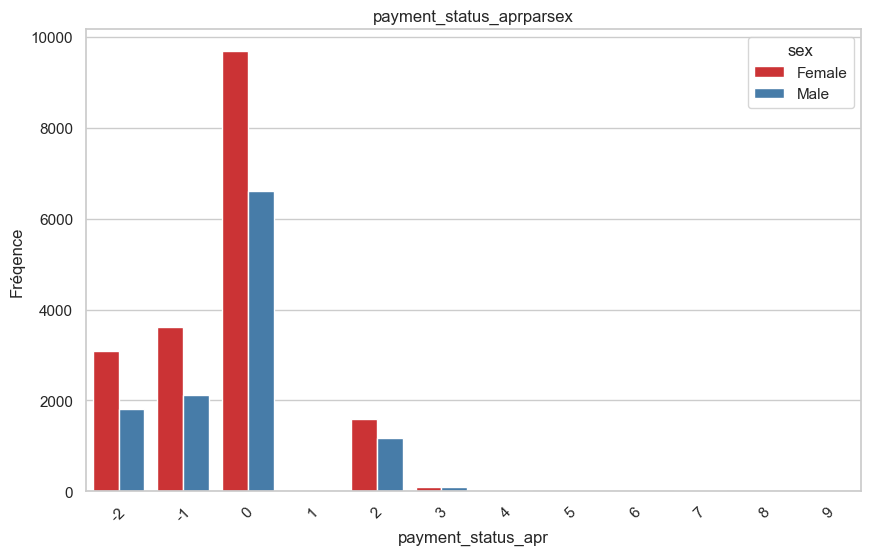

In [12]:
plot_discretize_distributions(df,'sex')

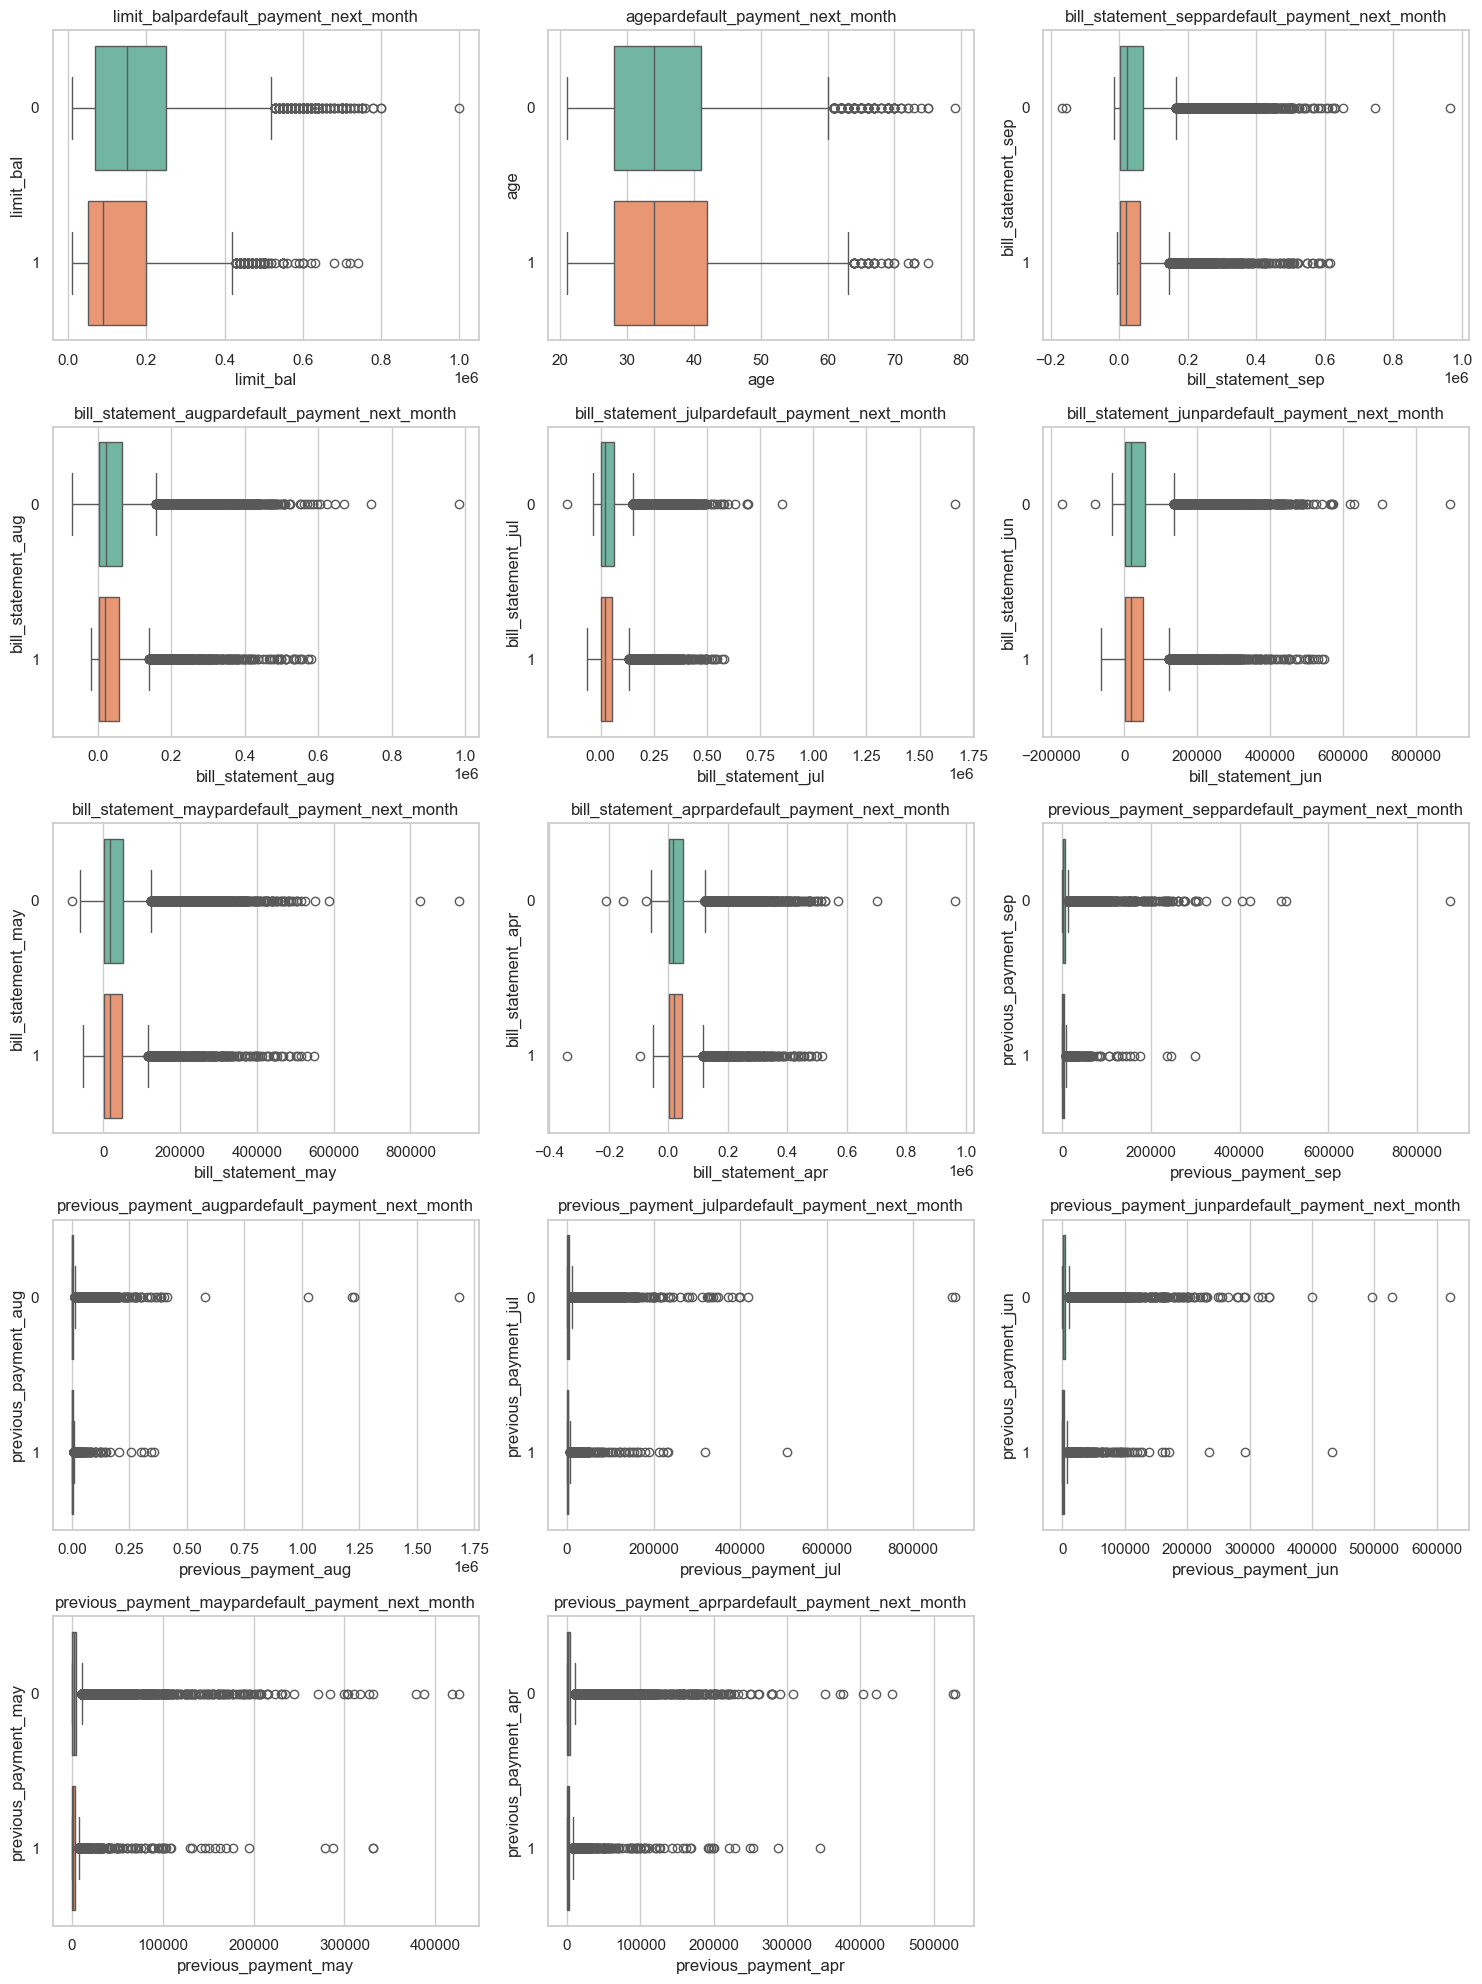

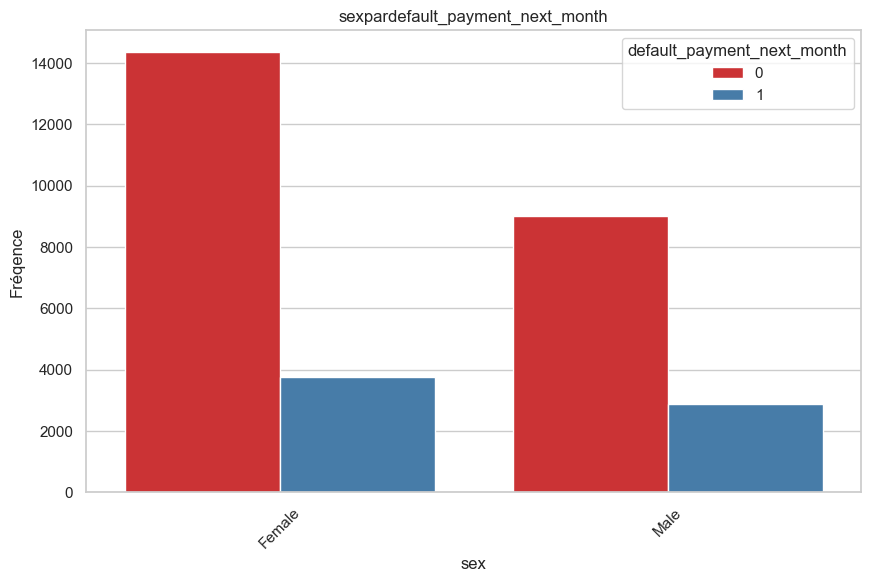

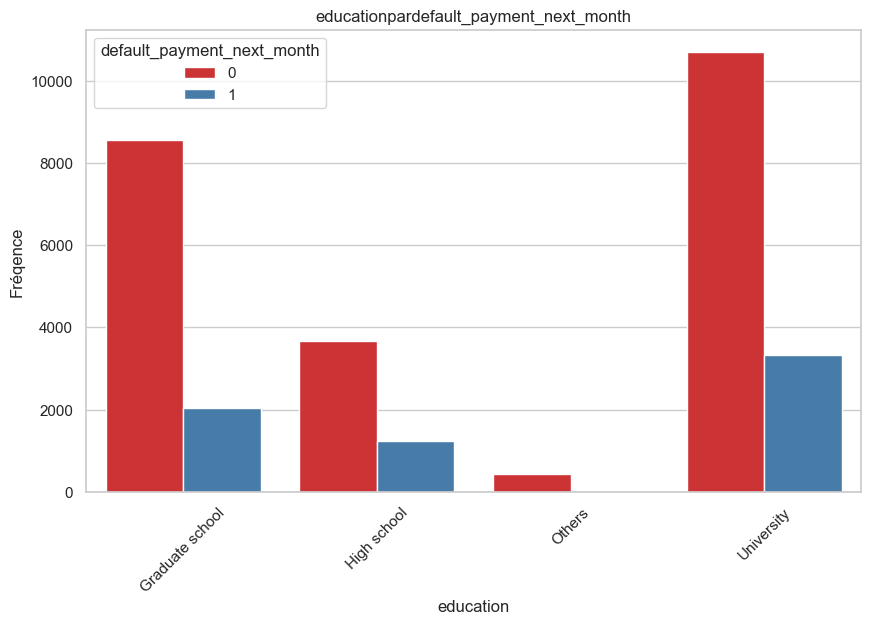

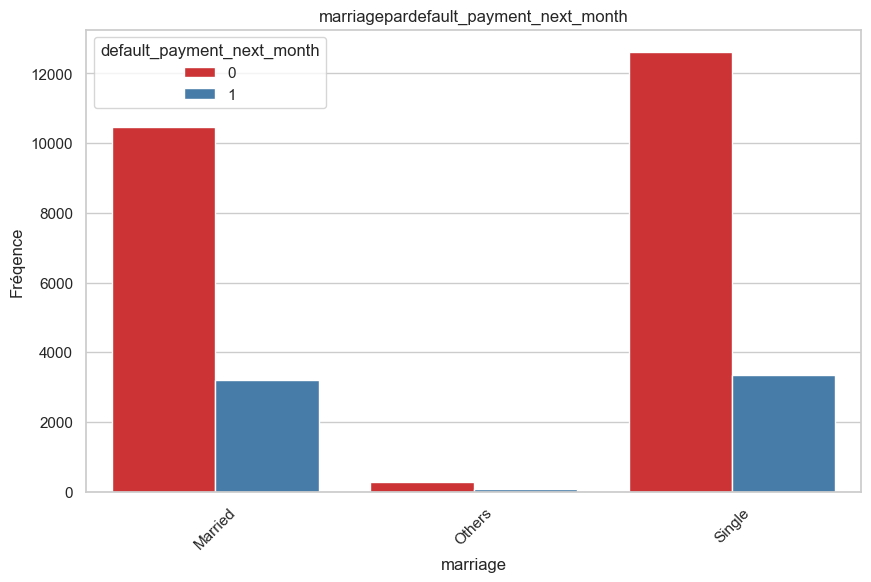

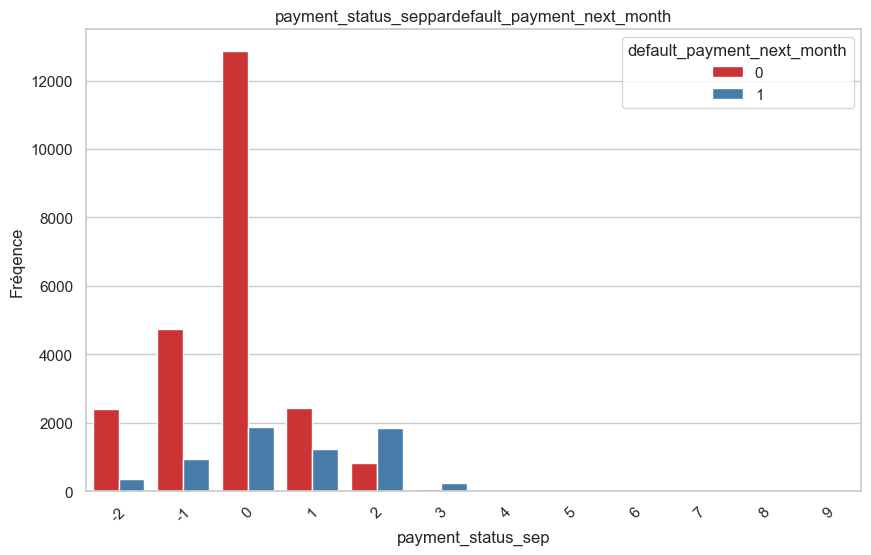

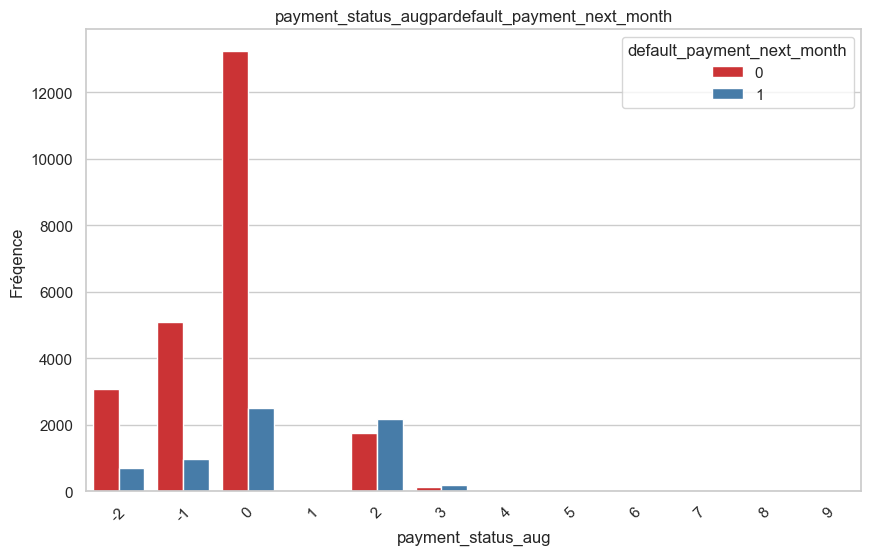

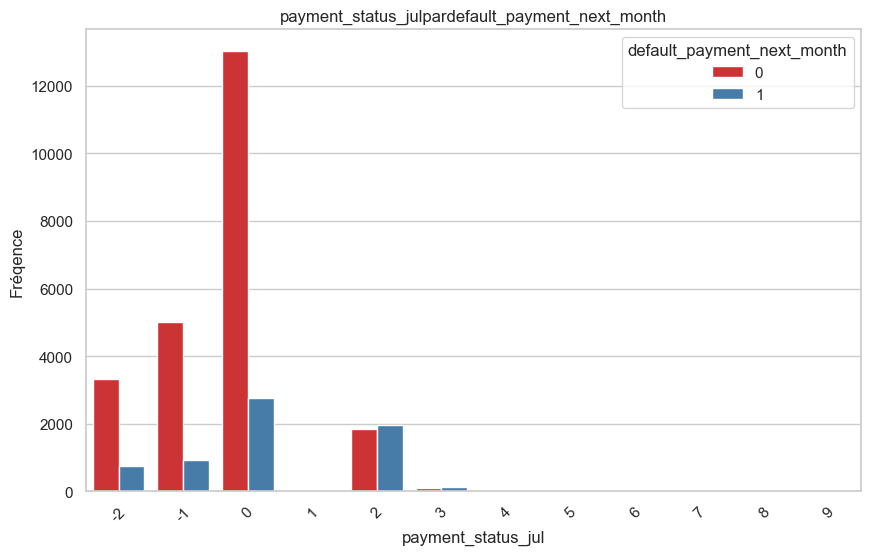

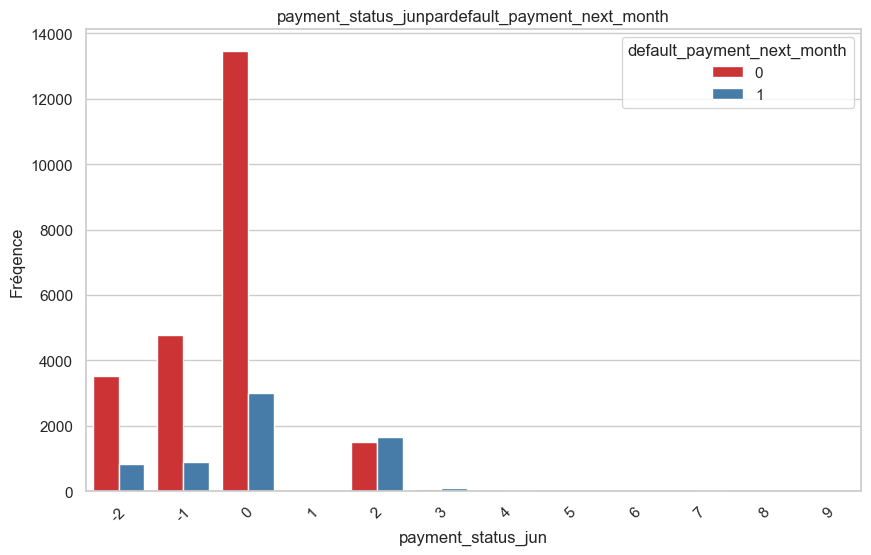

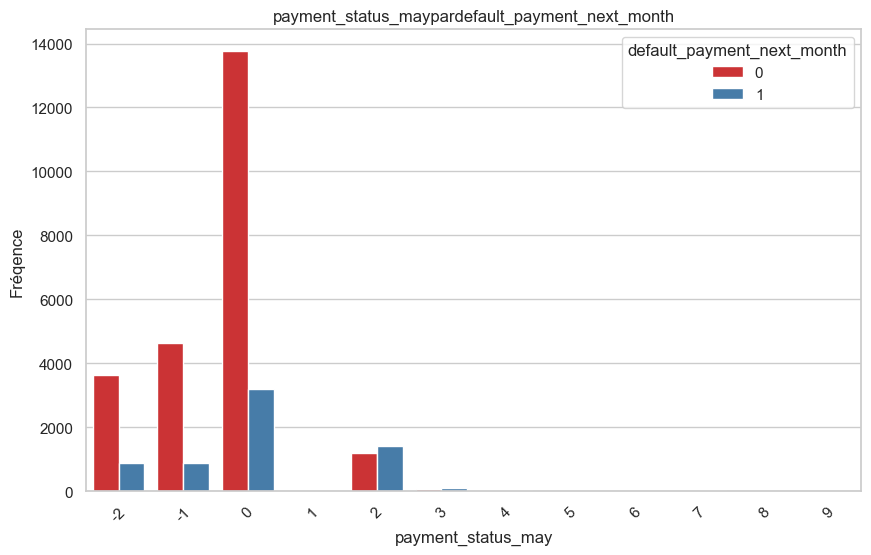

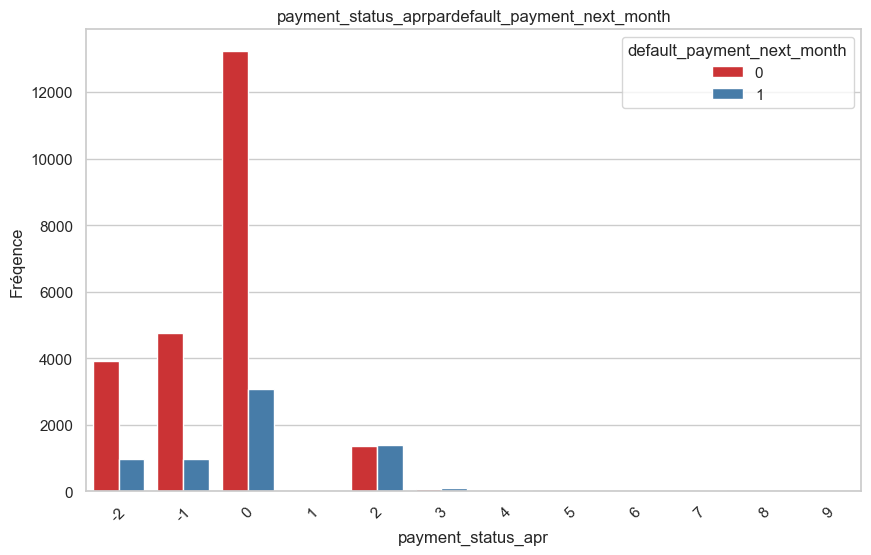

In [13]:
# Discretisation selon la variable cible

plot_discretize_distributions(df,'default_payment_next_month')

In [14]:
# Matrice de confusion

corr_mat = df [[c for c in df.columns if c not in ['id','sex','education','marriage']]].corr()
corr_mat

,limit_bal,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_statement_sep,bill_statement_aug,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
limit_bal,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
age,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
payment_status_sep,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
payment_status_aug,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
payment_status_jul,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
payment_status_jun,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
payment_status_may,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149
payment_status_apr,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,...,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866
bill_statement_sep,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,...,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
bill_statement_aug,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,...,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193


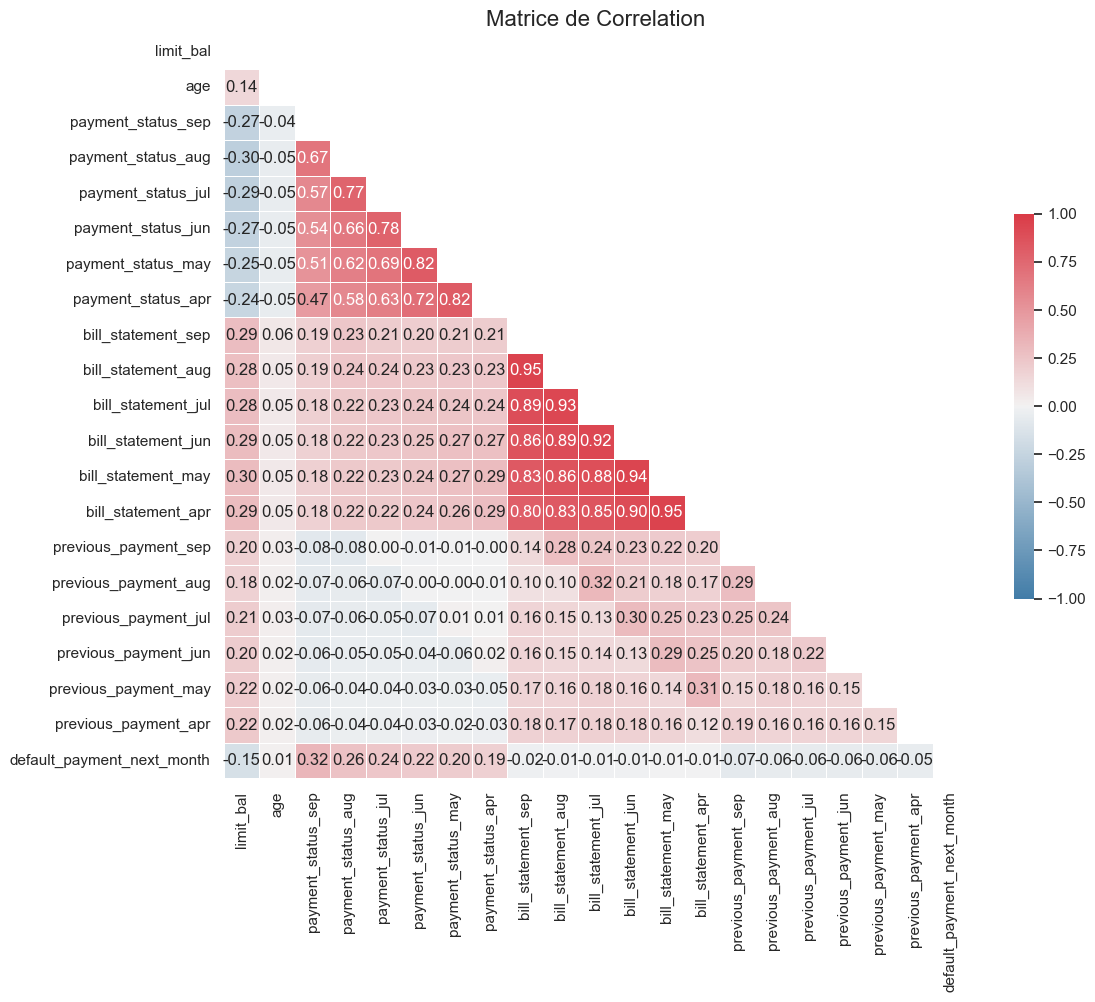

In [15]:
plot_correlation_matrix(corr_mat)

<Axes: xlabel='marriage', ylabel='limit_bal'>

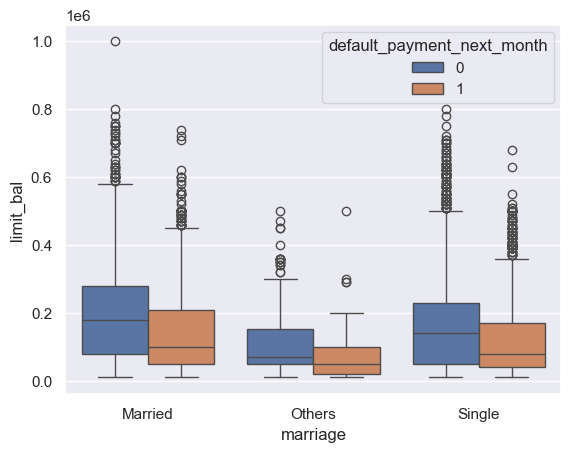

In [16]:
sns.boxplot(data=df,y='limit_bal',x='marriage',hue='default_payment_next_month')

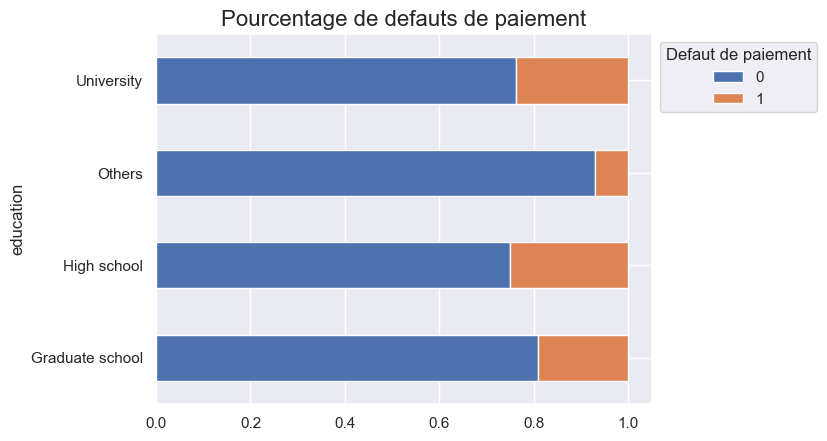

In [17]:
# Pourcentage de defaut de payment selon le niveau d'éducation

pct_default_by_category(df,"education")

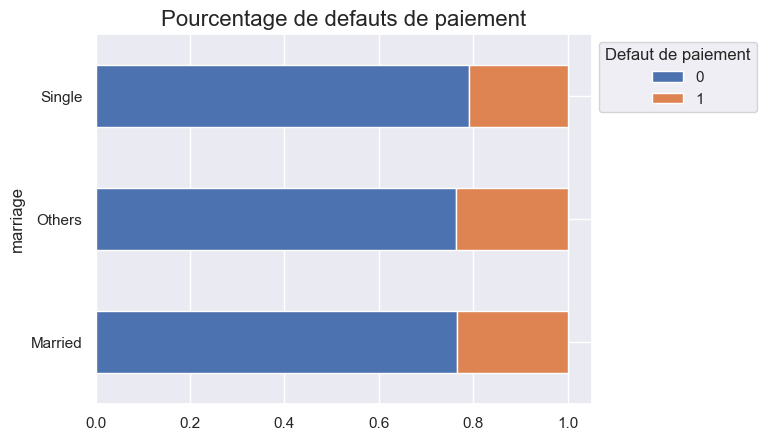

In [18]:
# Pourcentage de defaut de payment au niveau du statut marital

pct_default_by_category(df,'marriage')

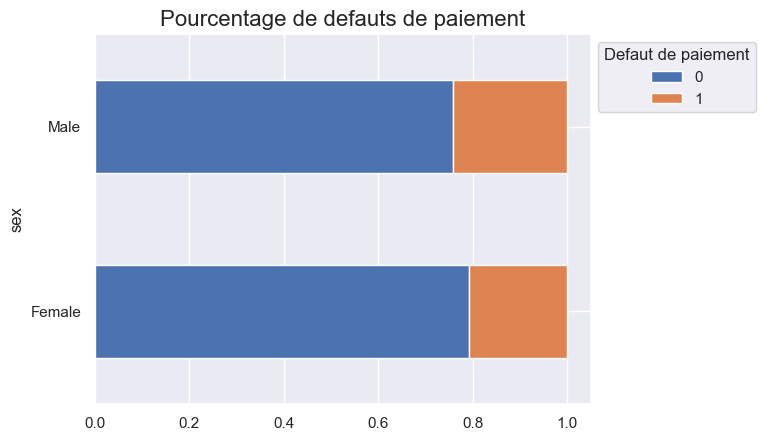

In [19]:
# Pourcentage de defaut de payment au niveau du genre

pct_default_by_category(df,'sex')

### SWEETVIZ

In [20]:
pip install setuptools 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Modélisation

### Division des données en 3 ensembles: Entrainement, Validation et Test

In [21]:
# Séparation des caractéristiques
X = df.drop(['id','default_payment_next_month'],axis=1)
y = df['default_payment_next_month']

# Distribution des classes dans chaque sous ensemble
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,stratify=y_temp,random_state=42)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

print(y.value_counts(normalize=True).values)
print(y_train.value_counts(normalize=True).values)
print(y_val.value_counts(normalize=True).values)
print(y_test.value_counts(normalize=True).values)

(18000, 23) (18000,)
(6000, 23) (6000,)
(6000, 23) (6000,)
[0.7788 0.2212]
[0.77877778 0.22122222]
[0.77883333 0.22116667]
[0.77883333 0.22116667]


In [22]:
# Verification des valeurs manquantes
X_train.isna().sum()

limit_bal               0
sex                     0
education               0
marriage                0
age                     0
payment_status_sep      0
payment_status_aug      0
payment_status_jul      0
payment_status_jun      0
payment_status_may      0
payment_status_apr      0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
dtype: int64

## Pipeline de modélisation

In [23]:
cat_features = ['sex','education','marriage']
num_features = [c for c in X_train.columns if c not in cat_features]
num_features 

['limit_bal',
 'age',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr',
 'bill_statement_sep',
 'bill_statement_aug',
 'bill_statement_jul',
 'bill_statement_jun',
 'bill_statement_may',
 'bill_statement_apr',
 'previous_payment_sep',
 'previous_payment_aug',
 'previous_payment_jul',
 'previous_payment_jun',
 'previous_payment_may',
 'previous_payment_apr']

In [24]:
cat_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(drop='first'))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_transformer,num_features),
        ('cat',cat_transformer,cat_features)
    ]
)

# Créer le pipeline avec un estimateur
rf_model = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocesor',preprocessor),
    ('model',rf_model)
])

pipeline

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
                                                   'previous_payment_jun',
                                                   'previous_payment_may',
                                                   'previous_payment_apr']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'education',
                                                   'marriage'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [25]:
# Entrainement du pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
                                                   'previous_payment_jun',
                                                   'previous_payment_may',
                                                   'previous_payment_apr']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'education',
                                                   'marriage'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [26]:
# Evaluation du modèle
LABELS = ['No Default','Default']
performance_evaluation_report(
    pipeline,X_val,y_val,labels=LABELS,
    show_plot=True,show_pr_curve=True
)

### Réglage des hyperparamètres avec une recherche par grille(Grid Search CV)

In [27]:
## Créer un objet de validation croisée stratifié (division des données en 5 split: validation croisé)
k_fold = StratifiedKFold(5,shuffle=True,random_state=42)

In [28]:
## Evaluer le pipeline à l'aide de la validation croisée
scores_cv = cross_val_score(pipeline,X_train,y_train,cv=k_fold,scoring='roc_auc')
print(scores_cv)


[0.76859131 0.76325458 0.76059887 0.74869527 0.76075016]


In [29]:
# Calcul de la moyenne et de l'ecart type
print(np.mean(scores_cv))
print(np.std(scores_cv))

0.7603780352392338
0.0065177681403093615


In [30]:
# Créer un dictionnaire de recherche
param_grid = {
    "model__criterion": ["entropy","gini"],
    "model__max_depth": range(7,11),
    "model__n_estimators": [100, 150, 200]
}

# Créer un objet grid rearch cv
classifier_gs = GridSearchCV(
    pipeline,param_grid,scoring='roc_auc',
    cv=k_fold,n_jobs=-1
)

# Entrainer l'object
classifier_gs.fit(X_train,y_train)

print(classifier_gs.best_params_)
print("Meilleur AUC sur le train set:", classifier_gs.best_score_)
print("Meilleur AUC sur les données de valaidation:",metrics.roc_auc_score(y_val,classifier_gs.predict(X_val)))


{'model__criterion': 'entropy', 'model__max_depth': 8, 'model__n_estimators': 100}
Meilleur AUC sur le train set: 0.7796092754786135
Meilleur AUC sur les données de valaidation: 0.6350935991540815


In [31]:
%matplotlib inline  

best_model=classifier_gs.best_estimator_

# Vérifier les performances sur les données de test

performance_evaluation_report(
    best_model,X_test,y_test,labels=LABELS,
    show_plot=True,show_pr_curve=True
    
)

plt.show()


In [32]:
# Enregistrer le modèle
import joblib
#from pathlib import Path

# model_path = Path(r"C:\Users\Brème MOUYARI\Documents\Projet_Detection_Defaut_de_Paiement_Credit_Bancaire\best_pkl")

In [33]:
joblib.dump(best_model, 'best_model.pkl')
#joblib.dump(best_model, model_path)

['best_model.pkl']

In [34]:
# loaded_model= joblib.load(model_path)
loaded_model= joblib.load('best_model.pkl')

### Utilisation du modèle

In [35]:
## Utiliser le modèle pour réaliser les prédictions
def make_prediction(model,features):
    prediction = model.predict(features)
    propability = model.predict_proba(features)
    propability = np.round(propability*100,2)
    return prediction,propability
    
#import pandas as pd
#import numpy as np

#def make_prediction(model, input_features):
    """
    Fait une prédiction avec le modèle et retourne la classe prédite et les probabilités
    
    Args:
        model: Modèle scikit-learn entraîné
        input_features: Dictionnaire ou DataFrame contenant TOUTES les features nécessaires
    
    Returns:
        tuple: (prediction, probabilities)
    """
    # 1. Convertir en DataFrame avec les bonnes colonnes
    #features_df = pd.DataFrame([input_features])
    
    # 2. Vérifier que toutes les colonnes nécessaires sont présentes
    #required_features = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else None
    
    #if required_features is not None:
      #  missing = set(required_features) - set(features_df.columns)
      #  if missing:
           # raise ValueError(f"Colonnes manquantes: {missing}. Colonnes nécessaires: {list(required_features)}")
    
    # 3. Faire la prédiction
    #try:
       # prediction = model.predict(features_df)[0]  # [0] car on prédit un seul échantillon
       # probabilities = model.predict_proba(features_df)[0]  # [0] pour le premier élément
       # probabilities = np.round(probabilities * 100, 2)  # Conversion en pourcentage
        
#return prediction, probabilities
    
        #except Exception as e:
        #raise ValueError(f"Erreur lors de la prédiction: {str(e)}")
    

In [36]:
## Prédiction sur les nouvelles données

new_data = X_train.sample(5)
new_data

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
782,100000,Female,Graduate school,Single,28,2,2,2,2,2,...,82759,83609,85325,87096,3790,3200,3100,3200,3332,3280
12461,210000,Female,High school,Married,27,1,-2,-1,-1,-2,...,1008,0,0,0,0,1008,0,0,0,1114
10578,70000,Female,Graduate school,Single,25,0,0,0,0,0,...,69003,70146,71592,66053,2519,2371,2544,3000,1866,1266
19319,80000,Female,University,Married,42,0,0,0,-1,-1,...,9821,600,53900,55000,1301,5098,600,53900,1100,10000
23506,260000,Female,Graduate school,Single,33,-2,-2,-2,-2,-2,...,-86,-86,17315,14961,3978,0,0,17401,15036,18207


In [37]:
make_prediction(loaded_model,new_data)

(array([1, 0, 0, 0, 0]),
 array([[25.19, 74.81],
        [76.01, 23.99],
        [87.48, 12.52],
        [84.57, 15.43],
        [88.86, 11.14]]))

In [38]:
pip install plotly-express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached plotly-6.1.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    -----------------------------------


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
